In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

## Capstone Project
#### Halak Desai, April 2021

## Notebook 3

### This notebook is a branch of Notebook 2 `Capstone_ML-Final`.  
### This notebook has different methods used for Undersampling and Oversampling my data to address class imbalance

In [2]:
X1 = pd.read_csv('Created_Data\Features.csv') # read csv downloaded from Notebook 2 
y1 = pd.read_csv('Created_Data\Target.csv') # read csv downloaded from Notebook 2

In [3]:
X1.shape

(29093, 6)

In [4]:
y1.to_numpy() #convert to numpy to ignore warning during running model.

array([[0],
       [0],
       [1],
       ...,
       [1],
       [0],
       [0]], dtype=int64)

In [61]:
y1.shape

(29093, 1)

In [62]:
# Splitting the data to reduce the data size (stratified on target value)
X_remainder, X_test, y_remainder, y_test = train_test_split(X1, y1, test_size=0.5, stratify = y1, random_state = 1)

In [63]:
# Splitting the data again to reduce the data size - to reduce computation time (stratified on target value)
X_train, X_validation, y_train, y_validation = train_test_split(X_remainder, y_remainder, test_size=0.3, stratify = y_remainder, random_state = 1)

In [64]:
y_train.value_counts() # Check that the sample set has original class imbalance

weighted_average_vote
0                        8680
1                        1502
dtype: int64

## Under Sampling

From imbalanced learn library I am going to first use NearMiss-2 selects the positive samples for which the average distance to the N farthest samples of the negative class is the smallest.  
I chose this method to try to find sample farthest from the minority class to keep them apart as much as possible.

https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.NearMiss.html

I am going to use the same set up of pipeline as used in Notebook 2 except I am going to use 3 K-Folds instead of 5.

Though accuracy of model is very important , my primary focus is on improving my confusion matrix.

In [44]:
from imblearn.under_sampling import NearMiss
nm1 = NearMiss(version=2)
X_resampled_nm1, y_resampled_nm1 = nm1.fit_resample(X_train, y_train)

In [45]:
y_resampled_nm1.value_counts()

weighted_average_vote
0                        1502
1                        1502
dtype: int64

In [65]:
%%time

estimators3 = [('normalize', MinMaxScaler()),
               ('model', LogisticRegression(max_iter = 3000))]
             
              

pipe3 = Pipeline(estimators3)

param_grid3 = [ {'normalize':[MinMaxScaler(), StandardScaler(), None],
                 'model': [LogisticRegression(solver = 'saga')],                         
                 'model__C': [0.001, 0.01, 0.1, 1, 10, 100]},
                {'normalize':[None],
                 'model': [DecisionTreeClassifier()],                          
                 'model__max_depth': [1,2,3,4,5]},
                {'normalize':[MinMaxScaler(), StandardScaler(), None],
                 'model': [SVC(probability = True)],                         
                 'model__C': [0.001, 0.01, 0.1, 1, 10, 100]}]                
    
             
             
grid3 = GridSearchCV(pipe3, param_grid3, cv=3)

fittedgrid3 = grid3.fit(X_resampled_nm1, y_resampled_nm1)

Wall time: 39 s


In [66]:
print(fittedgrid3.score(X_resampled_nm1, y_resampled_nm1))
print(fittedgrid3.score(X_validation, y_validation))

0.6927430093209055
0.4640238313473877


Accuracy is lower than imbalanced data set.  
Train set is about 69% and test score is 46%

In [67]:
fittedgrid3.best_estimator_

Pipeline(steps=[('normalize', StandardScaler()),
                ('model', LogisticRegression(C=0.001, solver='saga'))])

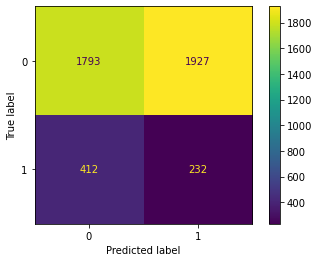

In [68]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Get class predictions
y_pred = fittedgrid3.predict(X_validation)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_validation, y_pred)

# Plot
ConfusionMatrixDisplay(cf_matrix).plot()
plt.show()

In [50]:
from sklearn.metrics import classification_report
report_initial = classification_report(y_validation, y_pred)
print(report_initial)

              precision    recall  f1-score   support

           0       0.81      0.48      0.61      3720
           1       0.11      0.36      0.17       644

    accuracy                           0.46      4364
   macro avg       0.46      0.42      0.39      4364
weighted avg       0.71      0.46      0.54      4364



So, I can see that there is significant drop to precision score than the imbalanced set and a little better on the recall score.

**Now I am going to also check Undersampling with RandomUnderSampler method**

From imbalanced learn library I am going to first useRandomUnderSampler is a fast and easy way to balance the data by randomly selecting a subset of data for the targeted classes.  
Hence, I am going to use this method to see how my model confusion matrix and accuracy looks.

https://imbalancedlearn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html#imblearn.under_sampling.RandomUnderSampler

In [51]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_resampled1, y_resampled1 = rus.fit_resample(X_train, y_train)

In [69]:
%%time

estimators2 = [('normalize', MinMaxScaler()),
               ('model', LogisticRegression(max_iter = 3000))]
             
              

pipe2 = Pipeline(estimators2)

param_grid2 = [ {'normalize':[MinMaxScaler(), StandardScaler(), None],
                 'model': [LogisticRegression(solver = 'saga')],                         
                 'model__C': [0.001, 0.01, 0.1, 1, 10, 100]},
                {'normalize':[None],
                 'model': [DecisionTreeClassifier()],                          
                 'model__max_depth': [1,2,3,4,5]},
                {'normalize':[MinMaxScaler(), StandardScaler(), None],
                 'model': [SVC(probability = True)],                         
                 'model__C': [0.001, 0.01, 0.1, 1, 10, 100]}]                
    
             
             
grid2 = GridSearchCV(pipe2, param_grid2, cv=3)

fittedgrid2 = grid2.fit(X_resampled1, y_resampled1)

Wall time: 52.8 s


In [70]:
print(fittedgrid2.score(X_resampled1, y_resampled1))
print(fittedgrid2.score(X_validation, y_validation))

0.6135153129161118
0.4569202566452796


Similar to Nearmiss method for test scores of about 46%, hence no improvement in accuracy.

In [71]:
fittedgrid2.best_estimator_

Pipeline(steps=[('normalize', StandardScaler()),
                ('model', SVC(C=1, probability=True))])

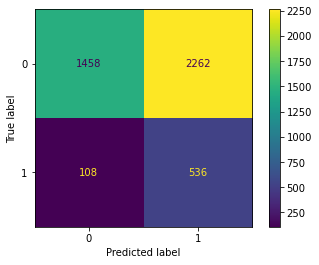

In [72]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Get class predictions
y_pred = fittedgrid2.predict(X_validation)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_validation, y_pred)

# Plot
ConfusionMatrixDisplay(cf_matrix).plot()
plt.show()

In [74]:
from sklearn.metrics import classification_report
report_initial = classification_report(y_validation, y_pred)
print(report_initial)

              precision    recall  f1-score   support

           0       0.93      0.39      0.55      3720
           1       0.19      0.83      0.31       644

    accuracy                           0.46      4364
   macro avg       0.56      0.61      0.43      4364
weighted avg       0.82      0.46      0.52      4364



So, I can see that there is significant drop to precision score than the imbalanced set but better than Nearmiss version 2 and a very good on the recall score than the Nearmiss version 2 and imbalanced set.

So from 2 of the undersampling methods, I am going to use `UnderRandomSampling` method as it gave me much better results on my Class 1 scores

In [57]:
from sklearn.metrics import roc_curve, roc_auc_score

y_resampled1_proba = fittedgrid2.predict_proba(X_resampled1)[:,1]
y_validation_proba = fittedgrid2.predict_proba(X_validation)[:,1]

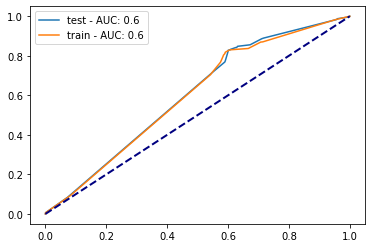

In [58]:
test_fpr, test_tpr, thresholds =  roc_curve(y_validation, y_validation_proba)
train_fpr, train_tpr, thresholds =  roc_curve(y_resampled1, y_resampled1_proba)

test_auc_score = round(roc_auc_score(y_validation, y_validation_proba), 2)
train_auc_score = round(roc_auc_score(y_resampled1, y_resampled1_proba), 2)

plt.figure()
plt.plot(test_fpr, test_tpr, label=f"test - AUC: {test_auc_score}")
plt.plot(train_fpr, train_tpr, label=f"train - AUC: {train_auc_score}")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.legend()
plt.show()

## Over Sampling

The Synthetic Minority Oversampling Technique (SMOTE).  
SMOTE generate new samples in by interpolation.    
SMOTE will not make any distinction between easy and hard samples to be classified using the nearest neighbors rule. 
https://imbalanced-learn.org/stable/over_sampling.html#from-random-over-sampling-to-smote-and-adasyn

In [76]:
from imblearn.over_sampling import SMOTE

In [77]:
sm = SMOTE(random_state=12)

X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

In [78]:
y_resampled.value_counts()

weighted_average_vote
0                        8680
1                        8680
dtype: int64

In [79]:
%%time

estimators1 = [('normalize', MinMaxScaler()),
               ('model', LogisticRegression(max_iter = 3000))]
             
              

pipe1 = Pipeline(estimators1)

param_grid1 = [ {'normalize':[MinMaxScaler(), StandardScaler(), None],
                 'model': [LogisticRegression(solver = 'saga')],                         
                 'model__C': [0.001, 0.01, 0.1, 1, 10, 100]},
                {'normalize':[None],
                 'model': [DecisionTreeClassifier()],                     
                 'model__max_depth': [1,2,3,4,5,6,7]},
                {'normalize':[MinMaxScaler(), StandardScaler(), None],                 
                 'model': [SVC(probability = True)],                         
                 'model__C': [0.001, 0.01, 0.1, 1, 10, 100]}]
    
    
             
             
grid1 = GridSearchCV(pipe1, param_grid1, cv=3)

fittedgrid1 = grid1.fit(X_resampled, y_resampled)

Wall time: 8h 45min 36s


In [80]:
print(fittedgrid1.score(X_resampled, y_resampled))
print(fittedgrid1.score(X_validation, y_validation))

0.6076612903225806
0.4571494042163153


The accuracy didnot improve while using oversampling method. The test scores are still similar to Undersampling of about 46%

In [81]:
fittedgrid1.best_estimator_

Pipeline(steps=[('normalize', MinMaxScaler()),
                ('model', LogisticRegression(C=0.01, solver='saga'))])

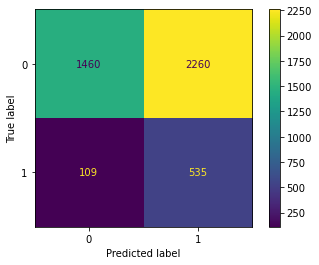

In [82]:
# Get class predictions
y_pred = fittedgrid1.predict(X_validation)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_validation, y_pred)

# Plot
ConfusionMatrixDisplay(cf_matrix).plot()
plt.show()

In [83]:
from sklearn.metrics import classification_report

report_initial = classification_report(y_validation, y_pred)
print(report_initial)

              precision    recall  f1-score   support

           0       0.93      0.39      0.55      3720
           1       0.19      0.83      0.31       644

    accuracy                           0.46      4364
   macro avg       0.56      0.61      0.43      4364
weighted avg       0.82      0.46      0.52      4364



I can see that the results from Undersampling and Oversampling are very similar for accuracies and confusion matrix.  
I can also see that the time to run Undersampling(in Seconds) than Oversampling(in Hours).  
Hence I am going to choose to use Undersampling Method to run in my main Notebook 2 over Oversampling Method.

In [26]:
from sklearn.metrics import roc_curve, roc_auc_score

# Caculate Proba for for the set

y_resampled_proba = fittedgrid1.predict_proba(X_resampled)[:,1] 
y_validation_proba = fittedgrid1.predict_proba(X_validation)[:,1]

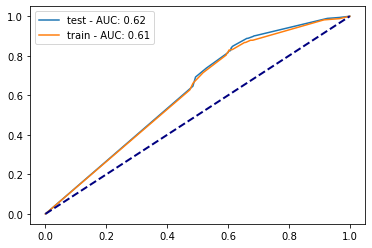

In [27]:
test_fpr, test_tpr, thresholds =  roc_curve(y_validation, y_validation_proba) # Calculate FPR and TPR scores
train_fpr, train_tpr, thresholds =  roc_curve(y_resampled, y_resampled_proba)

test_auc_score = round(roc_auc_score(y_validation, y_validation_proba), 2)
train_auc_score = round(roc_auc_score(y_resampled, y_resampled_proba), 2)

plt.figure()
plt.plot(test_fpr, test_tpr, label=f"test - AUC: {test_auc_score}")
plt.plot(train_fpr, train_tpr, label=f"train - AUC: {train_auc_score}")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.legend()
plt.show()

I can also see that my ROC score has improved marginally but very similar to Undersampled trainset.  
It is not significant enough compared to the run time of 8 hrs.  
Hence it confirms my earlier decision to use UnderSampling for addressing my imbalanced set.

# ---------------------------END of NOTEBOOK.....................................................